## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score , confusion_matrix , classification_report , accuracy_score


In [4]:
df = pd.read_csv("D:/cellula internship/first inten project.csv")

## EDA

In [5]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [6]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float

In [7]:
print(" Summary Statistics:")

df.describe()

 Summary Statistics:


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
print("Missing Values:")
print(df.isnull().sum())



Missing Values:
Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [9]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
print(f"Invalid date entries: {df['date of reservation'].isnull().sum()} rows")


Invalid date entries: 37 rows


In [10]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')


## Visualization

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


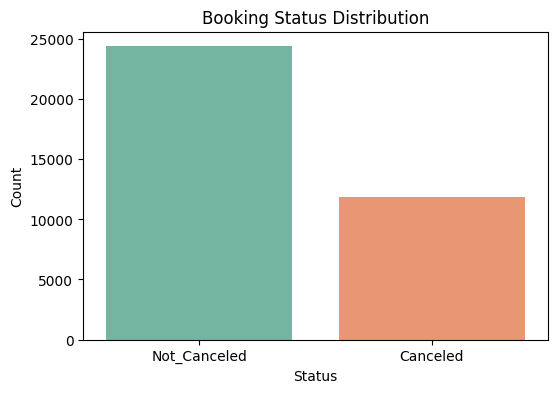

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='booking status', palette='Set2')
plt.title('Booking Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


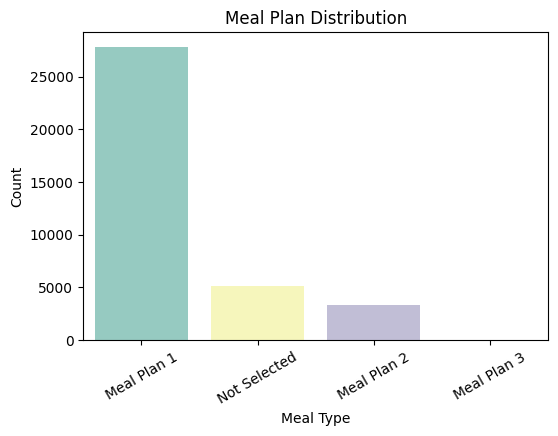

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type of meal', palette='Set3')
plt.title('Meal Plan Distribution')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


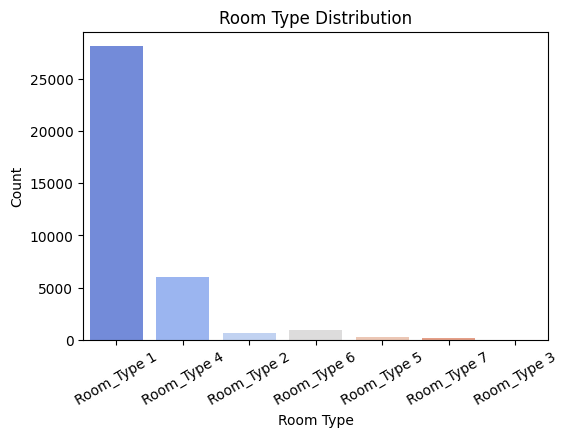

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='room type', palette='coolwarm')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


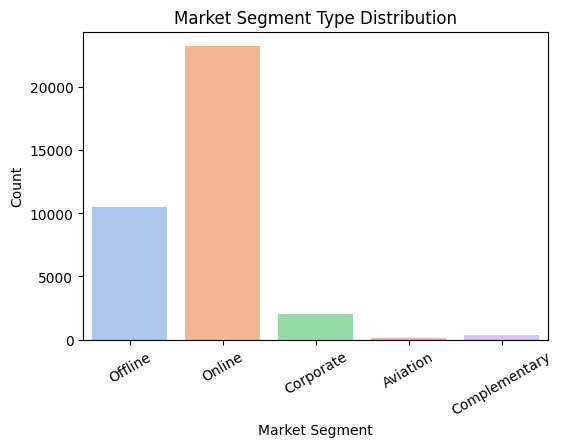

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='market segment type', palette='pastel')
plt.title('Market Segment Type Distribution')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

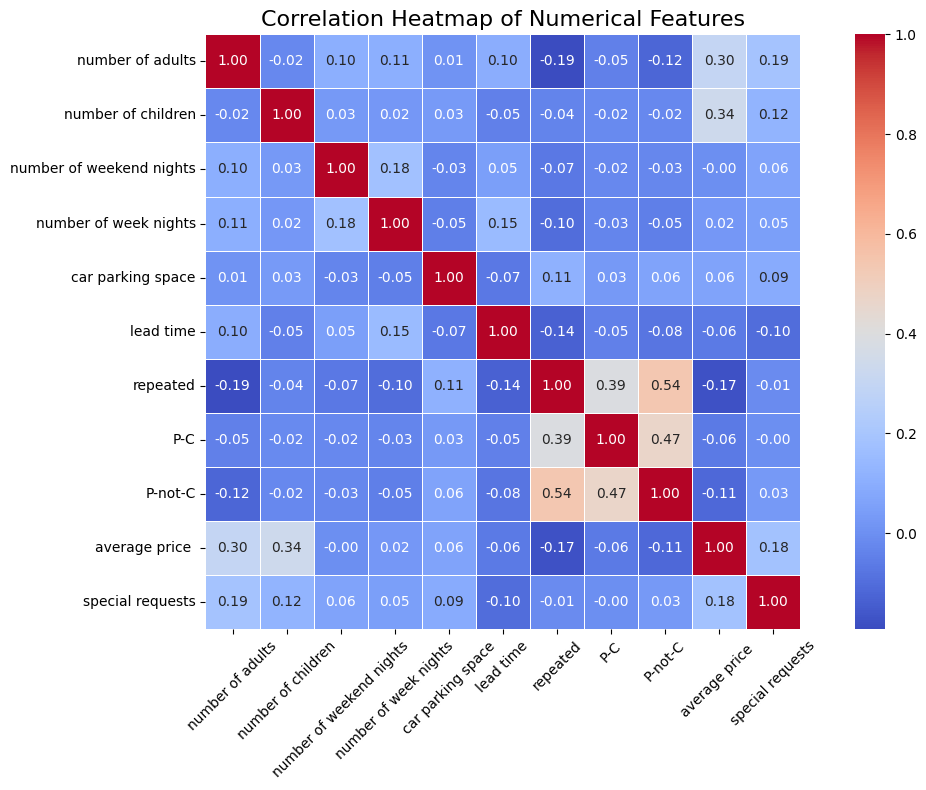

In [15]:

# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set figure size and style
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)

# Title and layout
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Preprocessing

In [16]:
# Check for missing values in each column
print("Missing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Booking_ID                   0
number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead time                    0
market segment type          0
repeated                     0
P-C                          0
P-not-C                      0
average price                0
special requests             0
date of reservation         37
booking status               0
dtype: int64


In [17]:
# Check data types of each column
print("\nData Types:")
print(df.dtypes)



Data Types:
Booking_ID                          object
number of adults                     int64
number of children                   int64
number of weekend nights             int64
number of week nights                int64
type of meal                        object
car parking space                    int64
room type                           object
lead time                            int64
market segment type                 object
repeated                             int64
P-C                                  int64
P-not-C                              int64
average price                      float64
special requests                     int64
date of reservation         datetime64[ns]
booking status                      object
dtype: object


## Check for Outliers using IQR 

In [18]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}: Found {outliers.shape[0]} outliers")
    return outliers

# Apply on numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    detect_outliers_iqr(df, col)


number of adults: Found 10175 outliers
number of children: Found 2702 outliers
number of weekend nights: Found 21 outliers
number of week nights: Found 324 outliers
car parking space: Found 1124 outliers
lead time: Found 1332 outliers
repeated: Found 930 outliers
P-C: Found 338 outliers
P-not-C: Found 812 outliers
average price : Found 1696 outliers
special requests: Found 762 outliers


In [19]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

df = df.reset_index(drop=True)

print("✅ Outliers removed from numerical columns (excluding 'booking status').")


✅ Outliers removed from numerical columns (excluding 'booking status').


In [20]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00013,2,0,2,1,Not Selected,0,Room_Type 1,30,Online,0,0,0,88.0,0,2018-11-26,Canceled
1,INN00015,2,0,0,2,Meal Plan 1,0,Room_Type 1,47,Online,0,0,0,94.5,2,2017-10-20,Not_Canceled
2,INN00016,2,0,0,2,Meal Plan 2,0,Room_Type 1,256,Online,0,0,0,115.0,1,2018-06-15,Canceled
3,INN00018,2,0,1,3,Not Selected,0,Room_Type 1,1,Online,0,0,0,96.0,1,2017-08-10,Not_Canceled
4,INN00019,2,0,2,2,Meal Plan 1,0,Room_Type 1,99,Online,0,0,0,65.0,0,2017-10-30,Canceled


In [21]:
print("Numerical Columns Cleaned:")
print(numerical_cols)

print("\nStatistics after removing outliers:")
print(df[numerical_cols].describe())


Numerical Columns Cleaned:
Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price ', 'special requests'],
      dtype='object')

Statistics after removing outliers:
       number of adults  number of children  number of weekend nights  \
count           21189.0             21189.0              21189.000000   
mean                2.0                 0.0                  0.846524   
std                 0.0                 0.0                  0.836132   
min                 2.0                 0.0                  0.000000   
25%                 2.0                 0.0                  0.000000   
50%                 2.0                 0.0                  1.000000   
75%                 2.0                 0.0                  2.000000   
max                 2.0                 0.0                  4.000000   

       number of week nights  car par

## Feature Engineering

In [22]:
df.drop(['date of reservation' , 'Booking_ID'], axis=1, inplace=True)


In [23]:
df['type of meal'] = df['type of meal'].map({
    'Meal Plan 1': 1,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3,
    'Not Selected': 0
})


In [24]:
print(df['market segment type'].unique())

['Online' 'Offline' 'Corporate' 'Complementary' 'Aviation']


In [25]:
df['market segment type'] = df['market segment type'].map({
    'Online': 1,
    'Offline': 2,
    'Corporate': 3,
    'Complementary': 4,
    'Aviation': 5
})


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['room type'] = le.fit_transform(df['room type'])

print(df[['room type']].head())

print(dict(zip(le.classes_, le.transform(le.classes_))))


   room type
0          0
1          0
2          0
3          0
4          0
{'Room_Type 1': 0, 'Room_Type 2': 1, 'Room_Type 3': 2, 'Room_Type 4': 3, 'Room_Type 5': 4, 'Room_Type 6': 5, 'Room_Type 7': 6}


In [27]:
df['booking status'] = df['booking status'].map({
    'Canceled': 1,
    'Not_Canceled': 0
})


In [28]:
df['room type'].unique()

array([0, 3, 4, 1, 5, 2, 6])

In [29]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,2,0,2,1,0,0,0,30,1,0,0,0,88.0,0,1
1,2,0,0,2,1,0,0,47,1,0,0,0,94.5,2,0
2,2,0,0,2,2,0,0,256,1,0,0,0,115.0,1,1
3,2,0,1,3,0,0,0,1,1,0,0,0,96.0,1,0
4,2,0,2,2,1,0,0,99,1,0,0,0,65.0,0,1


## Train test split

In [30]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,2,0,2,1,0,0,0,30,1,0,0,0,88.0,0,1
1,2,0,0,2,1,0,0,47,1,0,0,0,94.5,2,0
2,2,0,0,2,2,0,0,256,1,0,0,0,115.0,1,1
3,2,0,1,3,0,0,0,1,1,0,0,0,96.0,1,0
4,2,0,2,2,1,0,0,99,1,0,0,0,65.0,0,1


In [31]:
X = df.drop('booking status', axis=1)
y = df['booking status']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [33]:
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

Training Set Shape: (16951, 14)
Testing Set Shape: (4238, 14)


## Linear Regression model

In [34]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)


LinearRegression()

In [35]:
# Predict on test set
y_pred = lr_model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.1482
R-squared (R²): 0.3482


In [37]:
model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [38]:
# Predict on test set
y_pred = model.predict(X_test)


In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8004


In [40]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[2475  281]
 [ 565  917]]


In [41]:
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2756
           1       0.77      0.62      0.68      1482

    accuracy                           0.80      4238
   macro avg       0.79      0.76      0.77      4238
weighted avg       0.80      0.80      0.79      4238



In [42]:
with open('hotel_booking_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [44]:
# حفظ الداتا بعد كل التعديلات
df.to_csv('hotel_data.csv', index=False)

print("✅ Final data saved successfully as 'final_hotel_data.csv'")


✅ Final data saved successfully as 'final_hotel_data.csv'
